<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- Boston 데이터로 모델링합니다.
- SVM 알고리즘으로 모델링합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/boston.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# 기초통계량 확인
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# NaN 값 확인
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [6]:
# 상관관계 확인
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [7]:
# target 확인
target = 'medv'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**2) 정규화**

In [8]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

# 확인
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


**3) 학습용, 평가용 데이터 분리**

In [9]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.

In [10]:
# 1단계: 불러오기
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

# 2단계: 선언하기
model = SVR(kernel='linear', epsilon=0.1)

# 3단계: 학습하기
model.fit(x_train, y_train)

# 4단계: 예측하기
y_pred = model.predict(x_test)

# 5단계: 평가하기
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

3.3488162508220203
0.697632666285974


# 5.Epsilon과 C에 대한 이해

## 5.1.epsilon에 따른 성능 확인

- SVR 알고리즘에서 epsilon은 마진의 폭을 조절하는 역할을 합니다.
- 데이터셋의 특성에 따라 이 값이 영향을 주지 못하는 경우도 많이 있습니다.

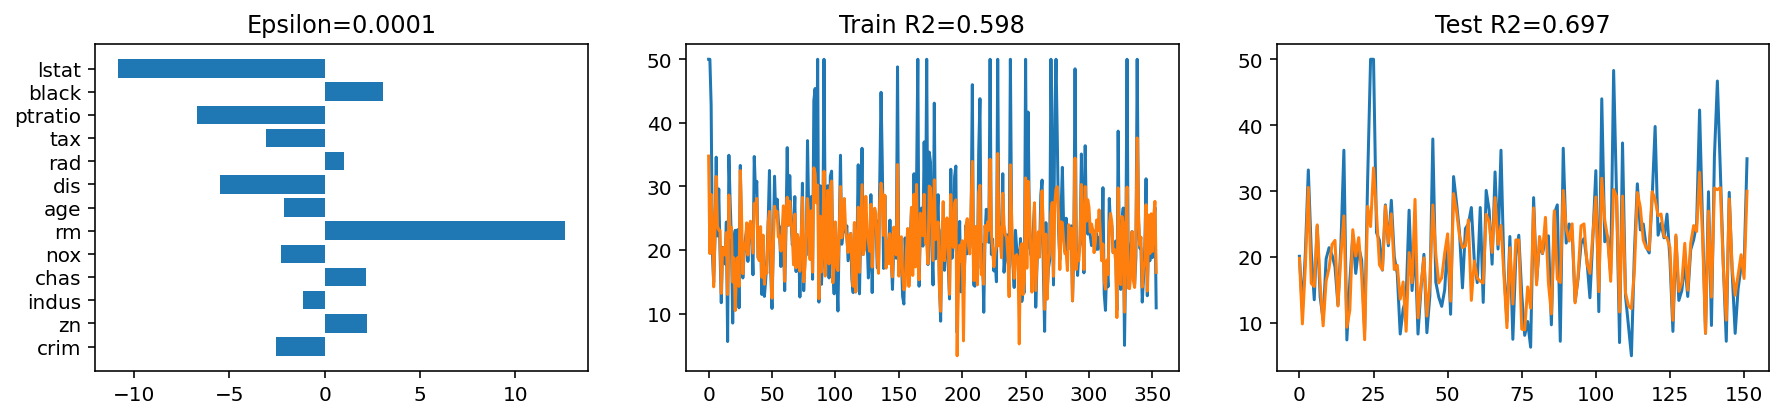

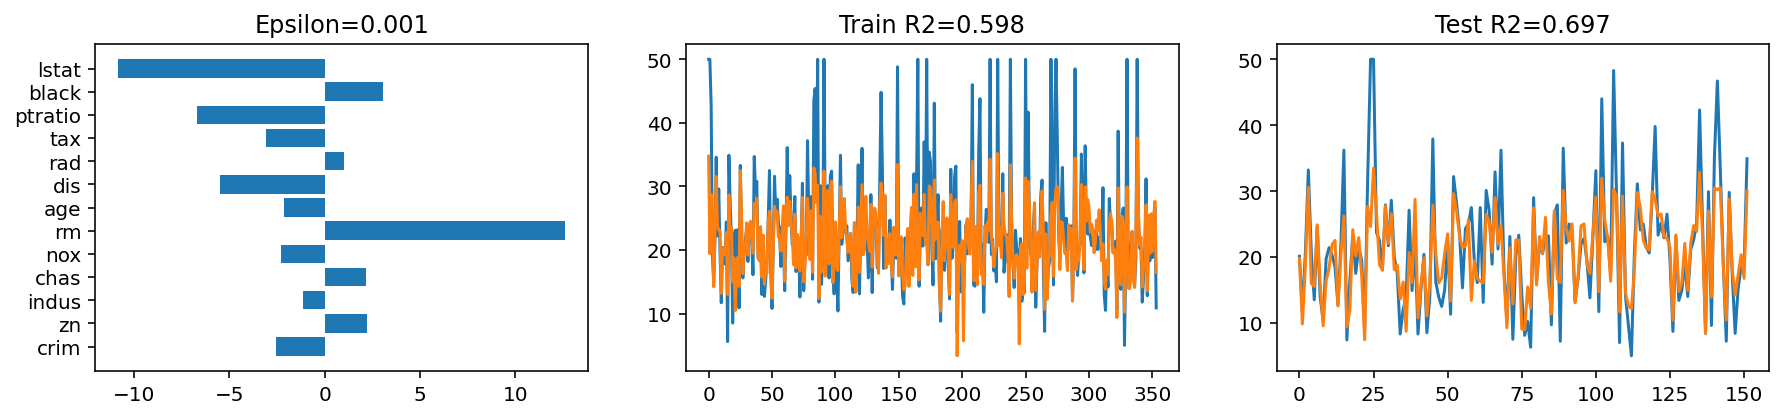

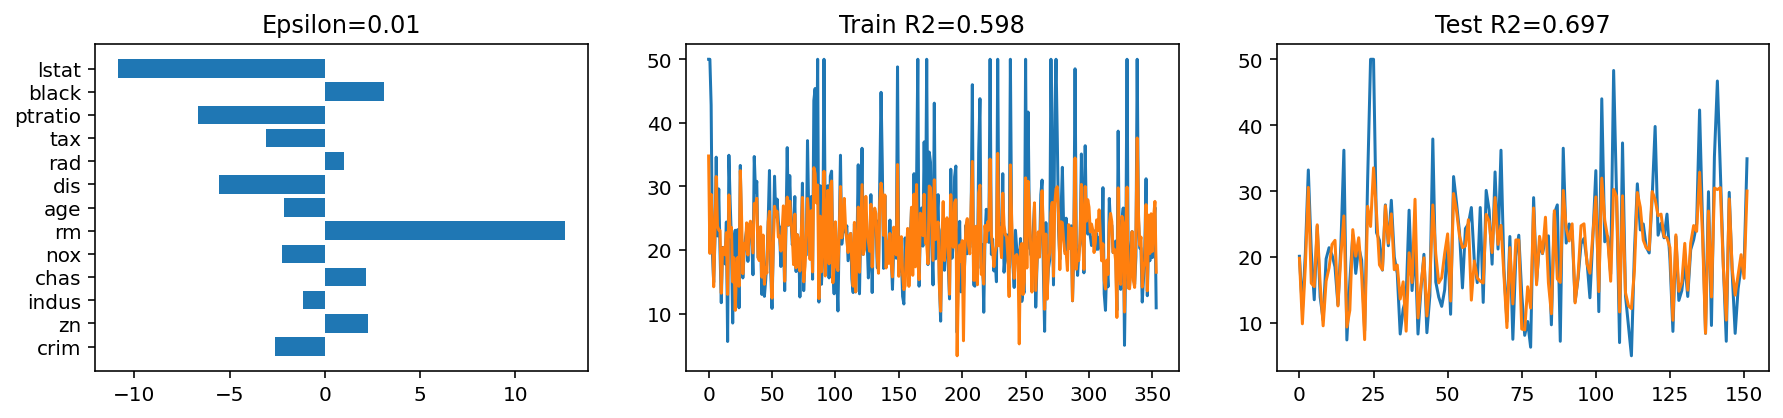

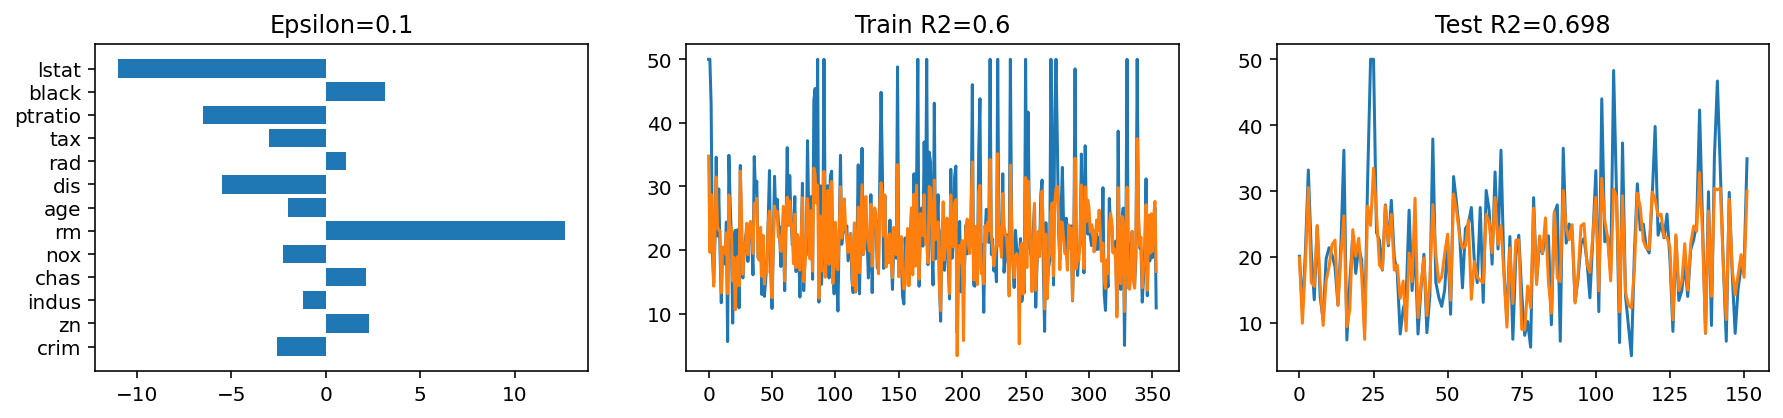

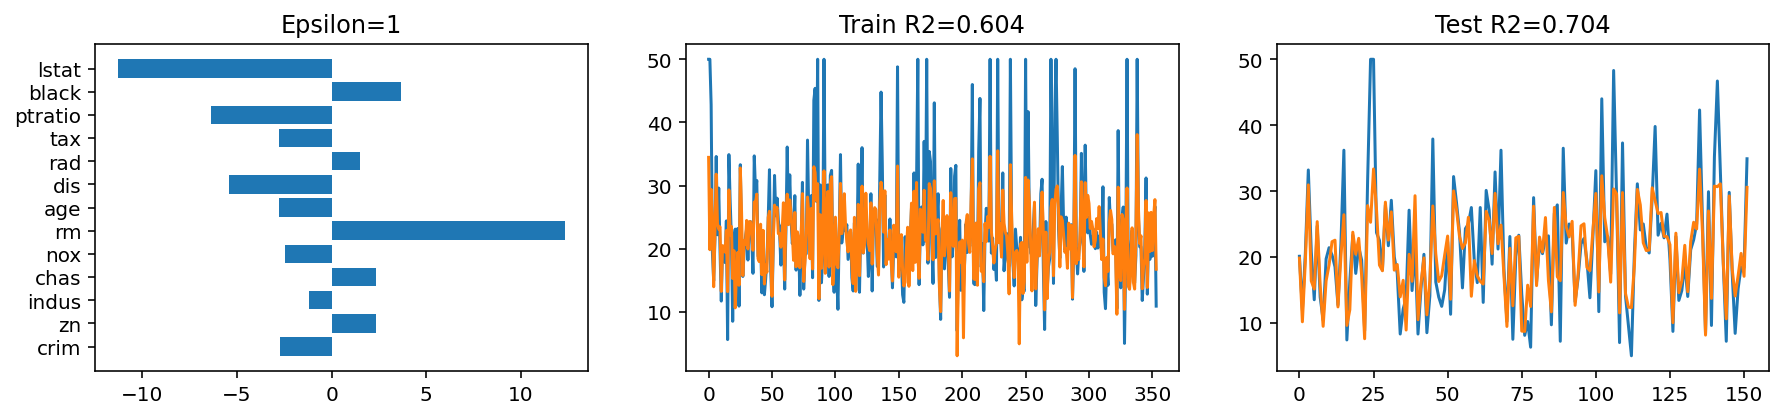

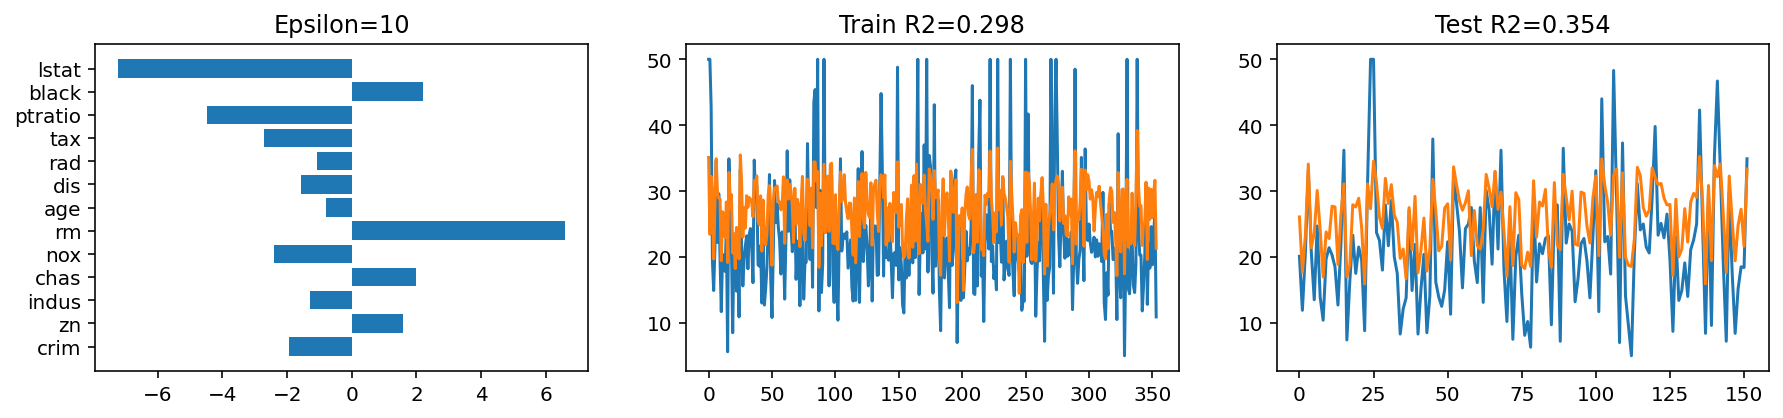

In [11]:
# 비교할 Epsilon 값
chk_ep = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# 시각화
for n in chk_ep:
    model = SVR(kernel='linear', epsilon=n)
    model.fit(x_train, y_train)

    plt.figure(figsize=(15, 3))
    
    # 가중치 시각화      
    plt.subplot(1, 3, 1)
    plt.title('Epsilon=' + str(model.epsilon))
    plt.barh(y=list(x), width=model.coef_.reshape(-1))
    
    # 학습 성능 시각화
    plt.subplot(1, 3, 2)
    plt.title('Train R2=' + str(model.score(x_train, y_train).round(3)))
    plt.plot(y_train.values)
    plt.plot(model.predict(x_train))  
    
    # 평가 성능 시각화
    plt.subplot(1, 3, 3)
    plt.title('Test R2=' + str(model.score(x_test, y_test).round(3)))
    plt.plot(y_test.values)
    plt.plot(model.predict(x_test))  
    
    plt.show()

## 5.2.C 값 변화에 따른 성능

- SVR에서 C 값은 규제(Regulization)에 사용됩니다.
- 규제는 과대적합을 방지하기 위해 강제로 가중치를 조정하는 역할입니다.
- SVR의 규제는 전체 가중치를 조절하는 L2 규제입니다.

In [ ]:
# 비교할 C 값
chk_c = [0.001, 0.01, 0.1, 1, 10, 100]

# 시각화
for n in chk_c:
    model = SVR(kernel='linear', C=n)
    model.fit(x_train, y_train)

    plt.figure(figsize=(15, 3))
    
    # 가중치 시각화     
    plt.subplot(1, 3, 1)
    plt.title('C=' + str(model.C))
    plt.barh(y=list(x), width=model.coef_.reshape(-1))
    
    # 학습 성능 시각화
    plt.subplot(1, 3, 2)
    plt.title('Train R2=' + str(model.score(x_train, y_train).round(3)))
    plt.plot(y_train.values)
    plt.plot(model.predict(x_train))  
    
    # 평가 성능 시각화
    plt.subplot(1, 3, 3)
    plt.title('Test R2=' + str(model.score(x_test, y_test).round(3)))
    plt.plot(y_test.values)
    plt.plot(model.predict(x_test))  
    
    plt.show()